### Questions
- What is the understanding of the intuition behind word2vec

### Objectives
YWBAT
- build a word2vec model in gensim
- create visualizations using gensim's word2vec tool
- apply phrase analysis on text

### Outline
- define a word embedding
- load and clean data for modeling
- build word2vec model using gensim
- create visualizations
- phrase analysis 

In [1]:
import pandas as pd
import numpy as np

from gensim.models import Word2Vec, Phrases
from nltk import word_tokenize

import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("News_Category_Dataset_v2.json", lines=True)
df.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [3]:
df["combined_text"] = df["headline"] + " " + df["short_description"]
df.head()

,authors,category,date,headline,link,short_description,combined_text
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...


### clean data 

In [26]:
def clean_text(text, punctuation=".?!,:;()'"):
    text = text.lower().strip().strip("\n")
    text = text.replace("\xa0", "")
    text = text.replace("\n", " ")
    text = text.replace("é", "e")
    text = text.replace("...", "")
    text = text.replace("\xad", "")
    for p in punctuation:
        text = text.replace(p, "")
    return text

In [27]:
df["clean_combined_text"] = [clean_text(text, punctuation=",:;()'’" + '"”‘“') for text in df["combined_text"]]
df.head()

,authors,category,date,headline,link,short_description,combined_text,clean_combined_text
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,there were 2 mass shootings in texas last week...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,will smith joins diplo and nicky jam for the 2...
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...,hugh grant marries for the first time at age 5...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts castrato adam schiff and dem...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...


### create word embeddings

In [28]:
### get vocab
vocab = set(word for text in df.clean_combined_text for word in text.split(" "))
len(vocab)

151626

In [35]:
tokenized_text = [text.split(" ") for text in df.clean_combined_text]
tokenized_text[0]

['there',
 'were',
 '2',
 'mass',
 'shootings',
 'in',
 'texas',
 'last',
 'week',
 'but',
 'only',
 '1',
 'on',
 'tv',
 'she',
 'left',
 'her',
 'husband.',
 'he',
 'killed',
 'their',
 'children.',
 'just',
 'another',
 'day',
 'in',
 'america.']

In [ ]:
embedding = Word2Vec(sentences=tokenized_text, size=30)

### Save your model for future use

In [ ]:
embedding.save("w2v_model_s30")

### Load it in when needed

In [4]:
embedding = Word2Vec.load("w2v_model_s30")

/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### Now let's play around with our model!!! :) 

In [5]:
embedding.wv.most_similar(positive=['texas'])

[('florida', 0.9480490684509277),
 ('oregon', 0.9319947957992554),
 ('connecticut', 0.9277305603027344),
 ('louisiana', 0.9266656637191772),
 ('utah', 0.9156169295310974),
 ('colorado', 0.9147211909294128),
 ('michigan', 0.9123942852020264),
 ('oklahoma', 0.9115188121795654),
 ('pennsylvania', 0.9061980247497559),
 ('ohio', 0.9032790660858154)]

### Let's plot these words

In [10]:
X = embedding[embedding.wv.vocab] # get my vectors and store them in X
X[:1]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[-7.1740067e-01,  4.0593519e+00, -2.8041775e+00,  3.5756748e+00,
         9.2844105e-01,  1.5091631e+00, -2.9064245e+00, -3.8687980e-03,
         3.1011260e+00, -1.3941528e-01,  3.1147366e+00,  2.3686349e+00,
         6.6410249e-01, -3.5142045e+00, -7.3795505e+00, -2.5086057e+00,
        -3.2340646e-01,  1.2376199e+00,  2.1115911e+00,  1.6515598e+00,
         2.4672434e+00, -1.8567715e+00,  1.7828335e+00, -3.1035137e+00,
         1.0301175e+00, -1.7078235e+00,  4.0169600e-01, -1.2757891e+00,
        -3.4645314e+00, -1.3705447e+00]], dtype=float32)

In [11]:
words = list(embedding.wv.vocab)
words[:5]

['there', 'were', '2', 'mass', 'shootings']

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

In [14]:
X_fitted = pca.fit_transform(X)

In [15]:
words_to_plot = ['texas'] + [w[0] for w in embedding.wv.most_similar(positive='texas')]
words_to_plot

['texas',
 'florida',
 'oregon',
 'connecticut',
 'louisiana',
 'utah',
 'colorado',
 'michigan',
 'oklahoma',
 'pennsylvania',
 'ohio']

In [16]:
indices = [words.index(word_to_plot) for word_to_plot in words_to_plot]
words_to_plot, indices

(['texas',
  'florida',
  'oregon',
  'connecticut',
  'louisiana',
  'utah',
  'colorado',
  'michigan',
  'oklahoma',
  'pennsylvania',
  'ohio'],
 [6, 2318, 10033, 6391, 4091, 6293, 7369, 4071, 5053, 4025, 5692])

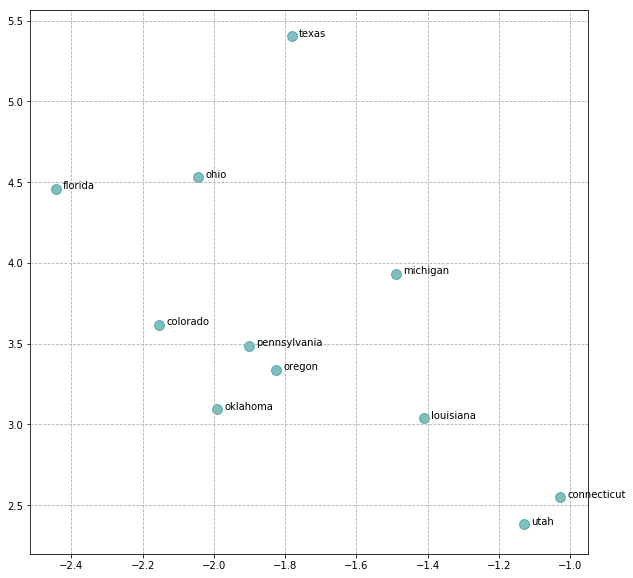

In [17]:
plt.figure(figsize=(10, 10))
for index, word in zip(indices, words_to_plot):
    vec = X_fitted[index]
    plt.scatter(vec[0], vec[1], c='teal', s=100, alpha=0.5)
    plt.annotate(word, vec+[0.02, 0])
plt.grid(linestyle='--')
plt.show()

### let's make this a function! 

In [84]:
def plot_most_similar_words(embedding=embedding, word='texas'):
    words_to_plot = [word] + [w[0] for w in embedding.wv.most_similar(positive=word)]
    print(words_to_plot)
    indices = [words.index(word_to_plot) for word_to_plot in words_to_plot]
    plt.figure(figsize=(10, 10))
    for index, word in zip(indices, words_to_plot):
        vec = X_fitted[index]
        if word==words_to_plot[0] or word==words_to_plot[1]:
            plt.scatter(vec[0], vec[1], c='teal', s=100)
            plt.annotate(word, vec+[0.02, 0], fontsize=14)
        else:
            plt.scatter(vec[0], vec[1], c='black', s=100)
            plt.annotate(word, vec+[0.02, 0], fontsize=12)
    plt.grid(linestyle='--')
    plt.show()

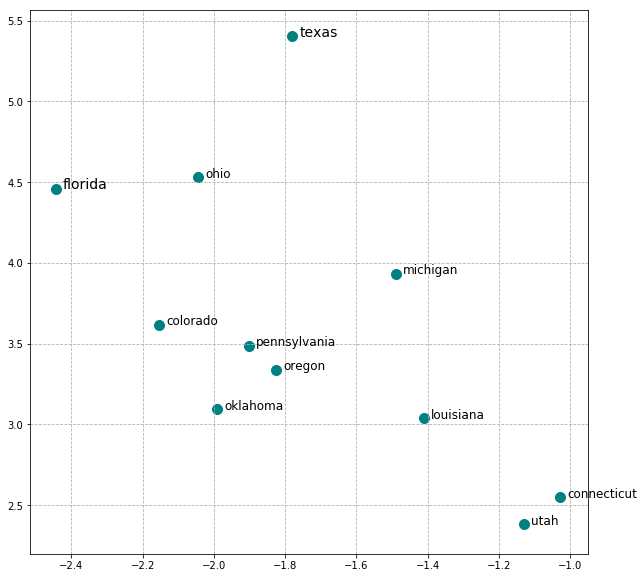

In [21]:
plot_most_similar_words('texas')

In [22]:
def plot_least_similar_words(word='texas'):
    words_to_plot = [word] + [w[0] for w in embedding.wv.most_similar(negative=word)]
    indices = [words.index(word_to_plot) for word_to_plot in words_to_plot]
    plt.figure(figsize=(10, 10))
    for index, word in zip(indices, words_to_plot):
        vec = X_fitted[index]
        plt.scatter(vec[0], vec[1], c='teal', s=100)
        if word==words_to_plot[0] or word==words_to_plot[1]:
            plt.annotate(word, vec+[0.02, 0], fontsize=14)
        else:
            plt.annotate(word, vec+[0.02, 0], fontsize=10)
    plt.grid(linestyle='--')
    plt.show()

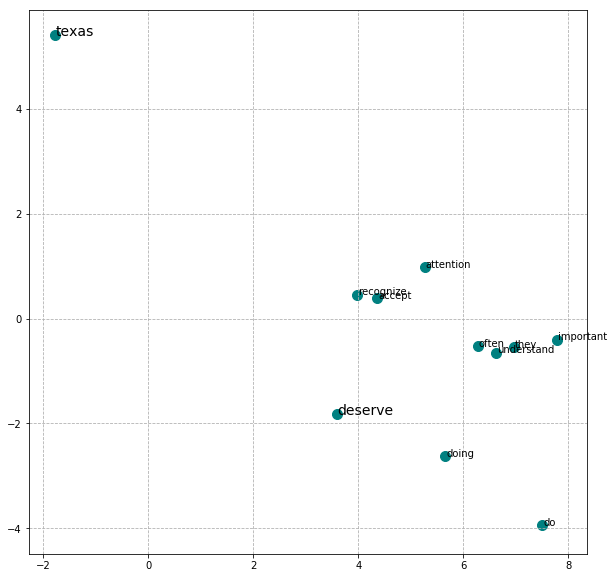

In [23]:
plot_least_similar_words(word='texas')

In [24]:
def plot_most_and_least_similar_words(word='texas'):
    words_to_plot = [word] + [w[0] for w in embedding.wv.most_similar(positive=word)] + [w[0] for w in embedding.wv.most_similar(negative=word)]
    indices = [words.index(word_to_plot) for word_to_plot in words_to_plot]
    plt.figure(figsize=(10, 10))
    for index, word in zip(indices, words_to_plot):
        vec = X_fitted[index]
        plt.scatter(vec[0], vec[1], c='teal', s=100)
        if word==words_to_plot[0] or word==words_to_plot[1]:
            plt.annotate(word, vec+[0.02, 0], fontsize=14)
        else:
            plt.annotate(word, vec+[0.02, 0], fontsize=10)
    plt.grid(linestyle='--')
    plt.show()
    
    

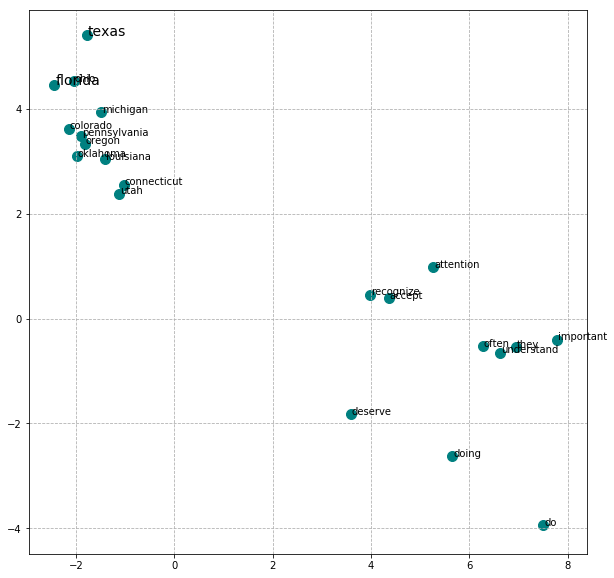

In [25]:
plot_most_and_least_similar_words()

### Let's try phrase analysis


In [36]:
phraser = Phrases(tokenized_text)

In [37]:
phraser.vocab

defaultdict(int,
            {b'there': 8223,
             b'were': 9192,
             b'there_were': 347,
             b'2': 1501,
             b'were_2': 2,
             b'mass': 537,
             b'2_mass': 1,
             b'shootings': 205,
             b'mass_shootings': 69,
             b'in': 95032,
             b'shootings_in': 17,
             b'texas': 986,
             b'in_texas': 125,
             b'last': 4482,
             b'texas_last': 2,
             b'week': 5570,
             b'last_week': 601,
             b'but': 20656,
             b'week_but': 39,
             b'only': 5283,
             b'but_only': 83,
             b'1': 1036,
             b'only_1': 14,
             b'on': 46664,
             b'1_on': 18,
             b'tv': 1391,
             b'on_tv': 141,
             b'she': 7004,
             b'tv_she': 2,
             b'left': 1354,
             b'she_left': 16,
             b'her': 12242,
             b'left_her': 17,
             b'husband.': 58,
    

In [43]:
phrased_tokenized_text = phraser[tokenized_text]
phrased_tokenized_text[0], phrased_tokenized_text[1]

(['there',
  'were',
  '2',
  'mass_shootings',
  'in',
  'texas',
  'last_week',
  'but',
  'only',
  '1',
  'on',
  'tv',
  'she',
  'left',
  'her_husband.',
  'he',
  'killed',
  'their_children.',
  'just',
  'another',
  'day',
  'in',
  'america.'],
 ['will_smith',
  'joins',
  'diplo',
  'and',
  'nicky',
  'jam',
  'for',
  'the',
  '2018',
  'world',
  'cups',
  'official',
  'song',
  'of_course',
  'it',
  'has',
  'a',
  'song.'])

In [44]:
phraser = Phrases(phrased_tokenized_text, min_count=4)

In [45]:
phraser.vocab

defaultdict(int,
            {b'there': 5827,
             b'were': 7934,
             b'there_were': 347,
             b'2': 911,
             b'were_2': 2,
             b'mass_shootings': 64,
             b'2_mass_shootings': 1,
             b'in': 92040,
             b'mass_shootings_in': 7,
             b'texas': 885,
             b'in_texas': 124,
             b'last_week': 602,
             b'texas_last_week': 1,
             b'but': 20591,
             b'last_week_but': 10,
             b'only': 4264,
             b'but_only': 83,
             b'1': 570,
             b'only_1': 11,
             b'on': 38669,
             b'1_on': 2,
             b'tv': 851,
             b'on_tv': 137,
             b'she': 5421,
             b'tv_she': 2,
             b'left': 1247,
             b'she_left': 13,
             b'her_husband.': 15,
             b'left_her_husband.': 1,
             b'he': 7872,
             b'her_husband._he': 1,
             b'killed': 968,
             b'he_killed

In [51]:
phrased_tokenized_text = phraser[tokenized_text]
phrased_embeddings = Word2Vec(phrased_tokenized_text, size=20)

In [67]:
phrased_embeddings.wv.vocab

{'there_were': <gensim.models.keyedvectors.Vocab at 0x1a637aaa58>,
 '2': <gensim.models.keyedvectors.Vocab at 0x1a642b34a8>,
 'mass_shootings': <gensim.models.keyedvectors.Vocab at 0x1a642b3f28>,
 'in': <gensim.models.keyedvectors.Vocab at 0x1a642b3d68>,
 'texas': <gensim.models.keyedvectors.Vocab at 0x1a642b3e48>,
 'last_week': <gensim.models.keyedvectors.Vocab at 0x1a642b3f98>,
 'but': <gensim.models.keyedvectors.Vocab at 0x1a642b37f0>,
 'only': <gensim.models.keyedvectors.Vocab at 0x1a642b64e0>,
 '1': <gensim.models.keyedvectors.Vocab at 0x1a642b6320>,
 'on': <gensim.models.keyedvectors.Vocab at 0x1a642b6828>,
 'tv': <gensim.models.keyedvectors.Vocab at 0x1a642b6978>,
 'she': <gensim.models.keyedvectors.Vocab at 0x1a642b6fd0>,
 'left': <gensim.models.keyedvectors.Vocab at 0x1a642b6c88>,
 'her_husband.': <gensim.models.keyedvectors.Vocab at 0x1a642b6358>,
 'he': <gensim.models.keyedvectors.Vocab at 0x1a642b6278>,
 'killed': <gensim.models.keyedvectors.Vocab at 0x1a642b68d0>,
 'their_

In [54]:
X = phrased_embeddings[phrased_embeddings.wv.vocab] # get my vectors and store them in X
X[:1]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[ 1.569506  ,  2.8514824 , -1.732085  , -0.04994096, -1.6888919 ,
        -1.5163289 ,  2.8033063 , -0.26735786, -1.0451019 ,  0.0908151 ,
         2.0341468 , -1.1820416 ,  0.9933097 , -0.4144381 , -1.1624928 ,
         2.3072157 ,  0.23162867,  2.5901186 ,  0.3018284 , -0.544792  ]],
      dtype=float32)

In [55]:
words = list(phrased_embeddings.wv.vocab)
words[:5]

['there_were', '2', 'mass_shootings', 'in', 'texas']

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(n_components=2)

In [58]:
X_fitted = pca.fit_transform(X)

In [59]:
words_to_plot = ['texas'] + [w[0] for w in phrased_embeddings.wv.most_similar(positive='texas')]
words_to_plot

['texas',
 'florida',
 'oregon',
 'michigan',
 'ohio',
 'arizona',
 'georgia',
 'kentucky',
 'colorado',
 'pennsylvania',
 'missouri']

['politics', 'political', 'democracy', 'racism', 'freedom', 'reality', 'our_country', 'power', 'religion', 'equality', 'critical']


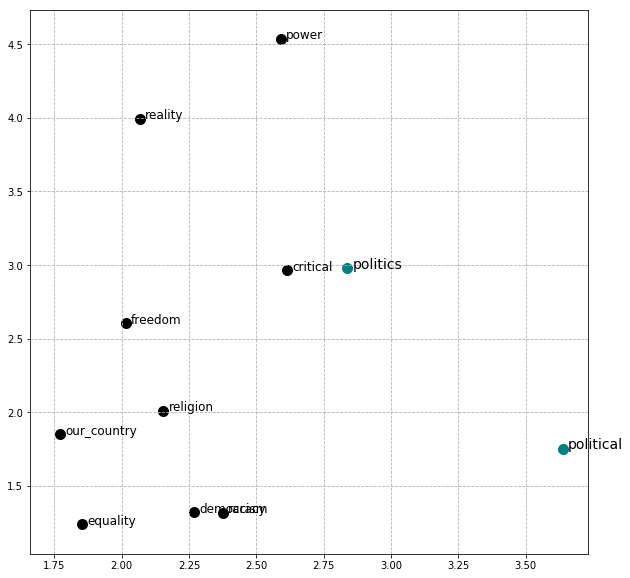

In [88]:
plot_most_similar_words(embedding=phrased_embeddings, word='politics')

### Assessment